https://github.com/jorisvandenbossche/geopandas-tutorial/blob/master/01-introduction-geospatial-data.ipynb

# **01**

**INSTALLARE GEOPANDAS**

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 39.0 MB/s 
     |████████████████████████████████| 15.4 MB 42.1 MB/s 


**ORA IMPORTIAMO PANDAS**

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

**MONTIAMO IL NOSTRO DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**IMPORTIAMO DALLA NOSTRA CARTELLA DRIVE/GEOPANDAS/DATA/ADMIN_0_COUNTRIES.ZIP**

In [ ]:
countries = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

### What's a GeoDataFrame?

**CONTROLLIAMO I PRIMI 5 TRAMITE UNA TABELLA, VISUALIZZANDO ANCHE I DATI**

In [ ]:
countries.head()

iso_a3  ...                                           geometry
0    AFG  ...  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1    AGO  ...  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2    ALB  ...  POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3    ARE  ...  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4    ARG  ...  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

[5 rows x 6 columns]

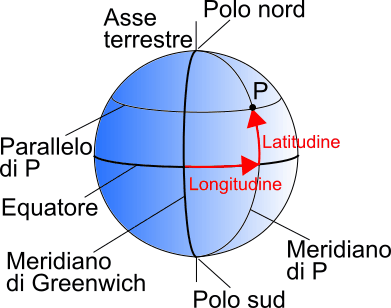

**VISUALIZZIAMO IL GRAFICO, DATO CHE NON ABBIAMO EFFETTUATO NESSUNA RESTRIZIONE ,VISUALIZZIAMO L'INTERO PIANETA**

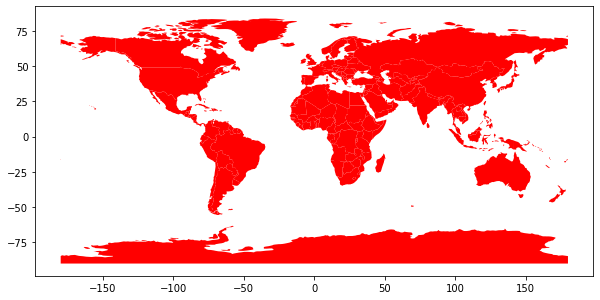

In [ ]:
countries.plot(figsize =( 10,10),facecolor = 'red')

In [ ]:
italia = countries[countries.name == 'Italy']
italia

iso_a3   name  ... gdp_md_est                                           geometry
79    ITA  Italy  ...  2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...

[1 rows x 6 columns]

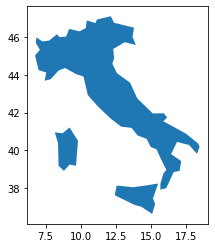

In [ ]:
italia.plot()

**verifichiamo il tipo di dataframe**

In [ ]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

**CALCOLIAMO L'AREA DELLE NAZIONI**

In [ ]:
countries.geometry.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**CALCOLIAMO LA MEDIA DELLA POPOLAZIONE MONDIALE**

In [ ]:
countries['pop_est'].mean()

41712369.84180791

PRENDE TUTTE LE NAZIONI CHE COINCIDONO CON 'AFRICA'

In [ ]:
africa = countries[countries['continent'] == 'Africa']

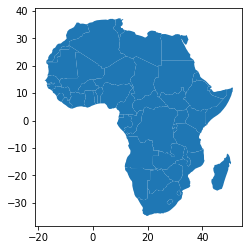

In [ ]:
africa.plot()

## Geometries: Points, Linestrings and Polygons

In [ ]:
cities = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_populated_places.zip")

**stampiamo le città del mondo**

In [ ]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


**e la mostriamo con la funzione plot**

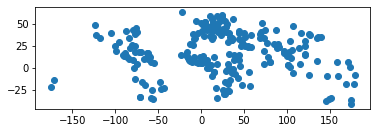

In [ ]:
cities.plot()

#**(01)RIVERS**

In [ ]:
rivers = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_50m_rivers_lake_centerlines.zip")

[(-40.0, 40.0), (-20.0, 60.0)]

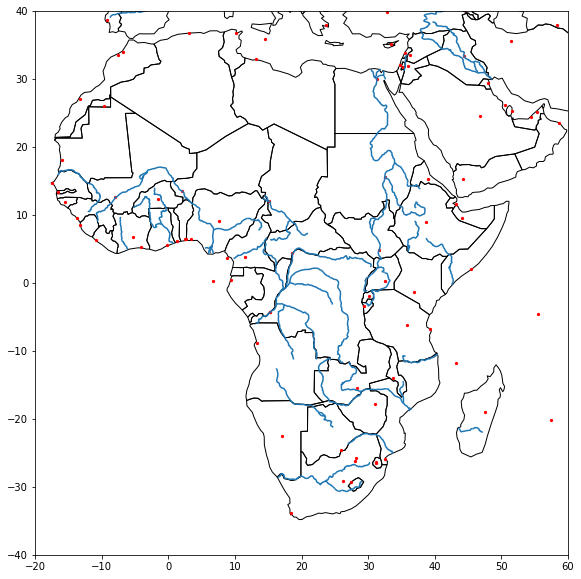

In [ ]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red',markersize = 5)  #ax=ax serve per copiare i fiumi nella mappa creata prima, markersize ci è servito per rimpicciolire i punti rossi, le città.
ax.set(xlim=(-20, 60), ylim=(-40, 40)) #diamo le coordinate.

ORA VISUALIZZIAMO L'EUROPA,IN PARTICOLARE,FIUMI,E CITTA'

[(35.0, 75.0), (-27.0, 160.0)]

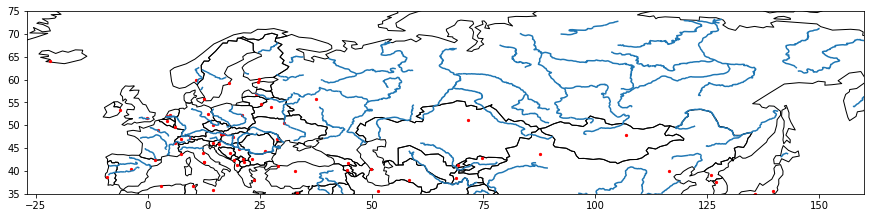

In [ ]:
ax = countries.plot(edgecolor = 'k',facecolor ='none',figsize=(15,10))
rivers.plot(ax=ax)
cities.plot(ax=ax,color='red',markersize = 5)
ax.set(xlim=(-27,160),ylim=(35,75))

## Let's practice!

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations_mercator.gpkg`

Both datasets are provided as  files.

Let's explore those datasets:

<div class="alert alert-success">

**EXERCISE**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object (with `type(..)`)
* Check the first rows of the dataframes. What kind of geometries dooes this datasets contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
    
<details><summary>Hints</summary>

* The geopandas.read_file() function can read different geospatial file formats. You pass the file name as first argument.

</details>
    
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data1.py

In [ ]:
stations = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_bike_stations_mercator.gpkg")

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data2.py

In [ ]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data3.py

In [ ]:
stations.head()['geometry']

0    POINT (259324.887 6247620.771)
1    POINT (267824.377 6249062.894)
2    POINT (267742.135 6250378.469)
3    POINT (271326.638 6250750.824)
4    POINT (270594.689 6248007.705)
Name: geometry, dtype: geometry

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data4.py

In [ ]:
stations.shape

(1226, 4)

<div class="alert alert-success">

**EXERCISE**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger byt setting the figure size to (12, 6) (hint: the `plot` method accepts a `figsize` keyword).
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data5.py

In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 6.7 MB/s 


In [ ]:
import contextily as ctx

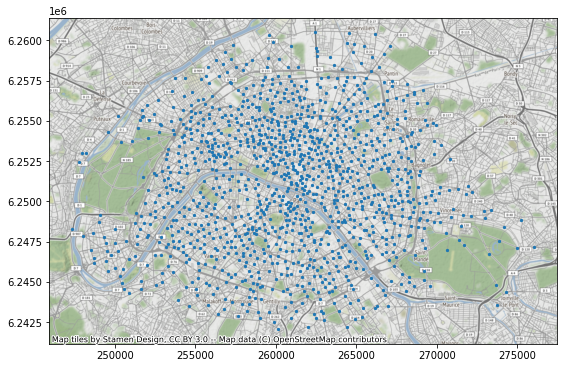

In [ ]:
ax = stations.plot(figsize=(12,6),markersize=5)
ctx.add_basemap(ax)

A plot with just some points can be hard to interpret without any spatial context. Therefore, in the next exercise we will learn how to add a background map.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object (returned by dataframe's `plot()` method) to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.




<div class="alert alert-success">

**EXERCISE**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data6.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data7.py

<div class="alert alert-success">

**EXERCISE**:

* Make a histogram showing the distribution of the number of bike stands in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data8.py

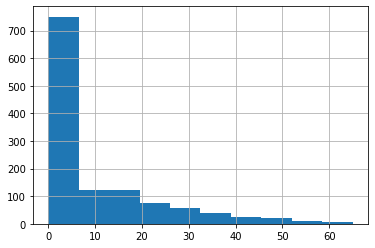

In [ ]:
stations.available_bikes.hist()

<div class="alert alert-success">

**EXERCISE**:

Let's now visualize where the available bikes are actually stationed:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` colums to determine the color of the points. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data9.py

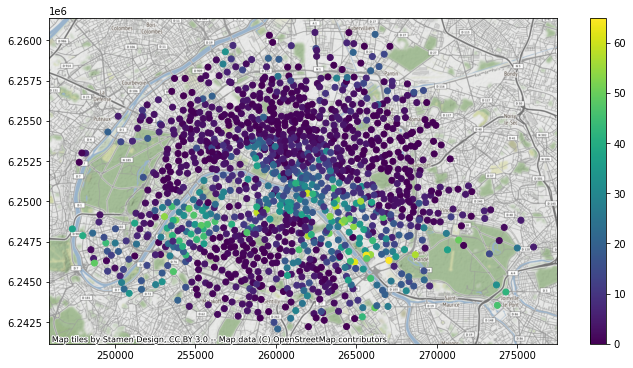

In [ ]:
ax = stations.plot(figsize=(12,6),column = 'available_bikes',legend = True)
ctx.add_basemap(ax)

<div class="alert alert-success">

**EXERCISE**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
* Make a quick plot of the `districts` dataset (set the figure size to (12, 6)).
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data10.py

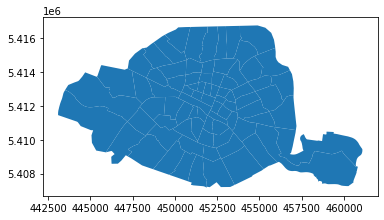

In [ ]:
district = geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_districts_utm.geojson')
district.plot()

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data11.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data12.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data13.py

<div class="alert alert-success">

**EXERCISE**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assing values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data14.py

In [ ]:
district.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [ ]:
district['area']= district.geometry.area
district

id  ...          area
0    1  ...  8.685379e+05
1    2  ...  4.122371e+05
2    3  ...  2.735494e+05
3    4  ...  2.693111e+05
4    5  ...  1.879097e+05
..  ..  ...           ...
75  76  ...  1.294254e+06
76  77  ...  8.061191e+05
77  78  ...  1.486139e+06
78  79  ...  1.598127e+06
79  80  ...  2.089783e+06

[80 rows x 5 columns]

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data15.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data16.py

<div class="alert alert-success">

**EXERCISE**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data17.py

In [ ]:
district['population_density'] = (district['population']/district['area'])*10**6
district

id           district_name  ...          area population_density
0    1  St-Germain-l'Auxerrois  ...  8.685379e+05        1925.074371
1    2                  Halles  ...  4.122371e+05       21793.281432
2    3            Palais-Royal  ...  2.735494e+05       11679.793285
3    4           Place-Vendôme  ...  2.693111e+05       11302.915113
4    5                 Gaillon  ...  1.879097e+05        7157.691434
..  ..                     ...  ...           ...                ...
75  76                  Combat  ...  1.294254e+06       30123.911627
76  77              Belleville  ...  8.061191e+05       44376.817729
77  78           Saint-Fargeau  ...  1.486139e+06       28319.685707
78  79           Père-Lachaise  ...  1.598127e+06       26488.507305
79  80                Charonne  ...  2.089783e+06       30099.295856

[80 rows x 6 columns]

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data18.py

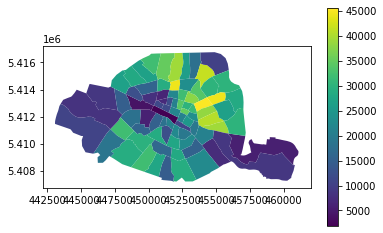

In [ ]:
district.plot(column= 'population_density',legend = True)


In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data19.py

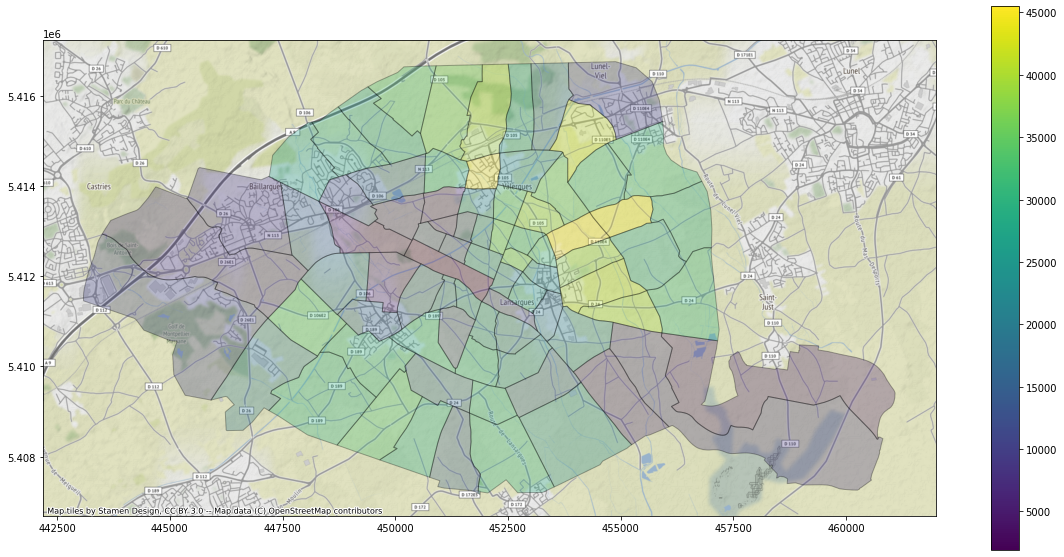

In [ ]:
ax = district.plot(figsize =(20,10),alpha =0.3,edgecolor = 'k',column= 'population_density',legend = True)  #alpha = trasparenza, edgecolor = contorni
ctx.add_basemap(ax)

scrivere il codice necessario per visualizzare i distretti di Parigi che hanno densità superiore a 5000 abitanti a km**2

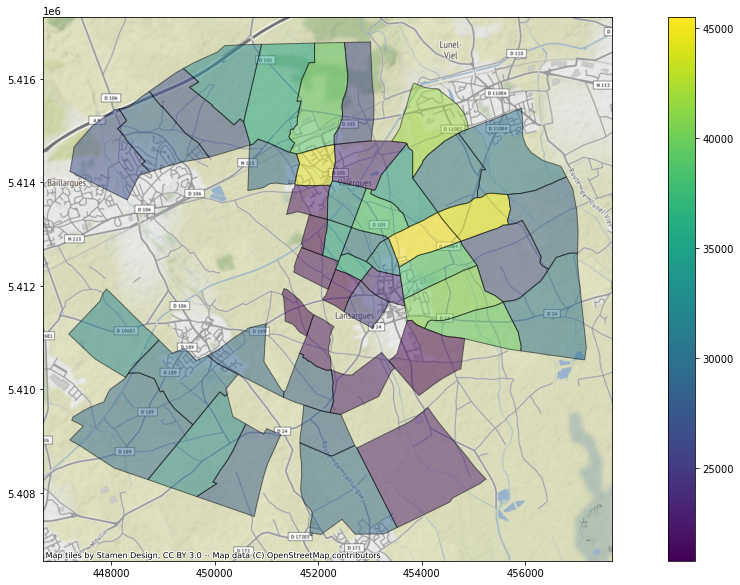

In [ ]:
dst = district[(district['population_density'] > 20000)]
ax = dst.plot(figsize =(20,10),alpha =0.5,edgecolor = 'k',column= 'population_density',legend = True)
ctx.add_basemap(ax)

scrivere il codice necessario per avere i distretti di Parigi che hanno meno densità minore a 500.000 abitanti

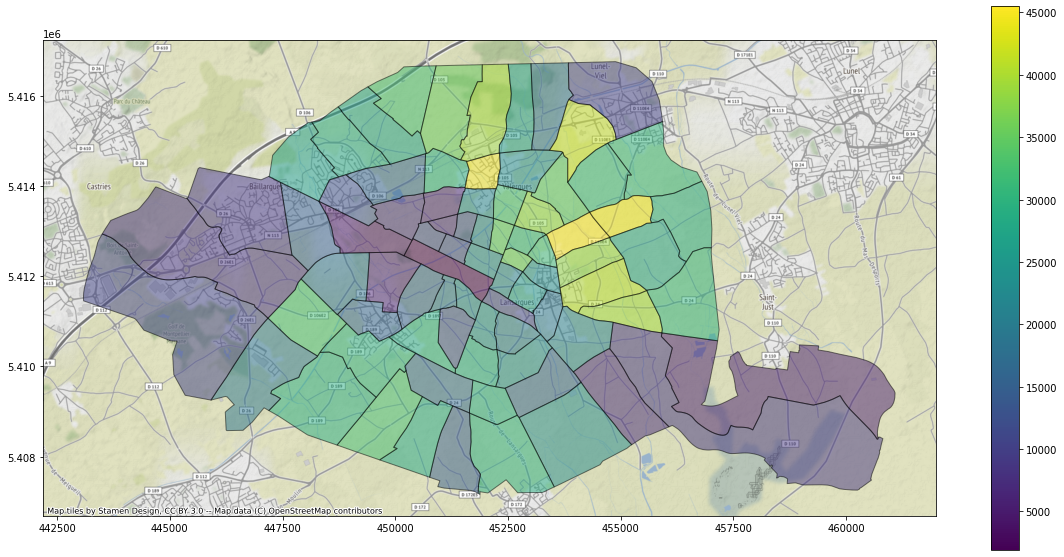

In [ ]:
dst = district[(district['population_density'] < 500000)]
ax = dst.plot(figsize =(20,10),alpha =0.5,edgecolor = 'k',column= 'population_density',legend = True)
ctx.add_basemap(ax)

scrivere il codice necessario per avere le stazioni di biciclette presenti in un quartiere inserito dall'utente

In [ ]:











quart =str(input('inserire quartiere'))

inserire quartierergr


# **02 Coordinate reference systems**

https://github.com/jorisvandenbossche/geopandas-tutorial/blob/master/02-coordinate-reference-systems.ipynb

**!!!in Python we use (lon, lat) and not (lat, lon)!!!**

In [ ]:
countries = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_50m_rivers_lake_centerlines.zip")

**.crs** mostra le informazioni, coordiante, nome e altro.


In [ ]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can convert a GeoDataFrame to another reference system using the to_crs function.                                                                     For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [ ]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [ ]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})   #to_crs per andare da un sistema di mappaggio all'altro.

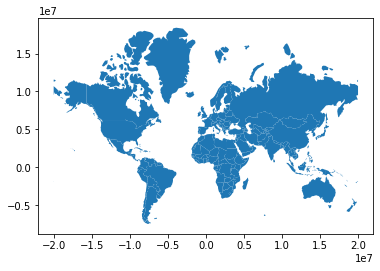

In [ ]:
countries_mercator.plot()

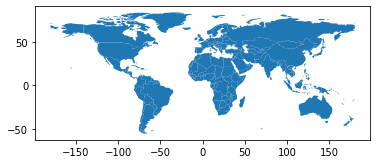

In [ ]:
countries.plot()  #per vedere la differenza

### Perchè usare CRS diversi?

A volte ci sono buoni motivi per cui vuoi cambiare il sistema di riferimento delle coordinate del tuo set di dati, ad esempio:

- Sorgenti diverse con CRS diversi -> è necessario convertire nello stesso CRS

    ```python
    df1 = geopandas.read_file(...)
    df2 = geopandas.read_file(...)

    df2 = df2.to_crs(df1.crs)
    ```

-Mappatura (distorsione di forma e distanze)

- Calcoli basati su distanza / area -> assicurati di utilizzare un sistema di coordinate proiettato appropriato espresso in un'unità significativa come metri o piedi (non gradi).

<div class="alert alert-info" style="font-size:120%">

**ATTENTION:**

Tutti i calcoli che avvengono nei geopanda e presuppongono in modo corretto che i tuoi dati si trovino su un piano cartesiano 2D, e quindi il risultato di quei calcoli sarà corretto solo se i tuoi dati sono proiettati correttamente.

</div>

## Let's practice!

Again, we will go back to the Paris datasets. Up to now, we provided the datasets in an appropriate projected CRS for the exercises. But the original data actually were geographic coordinates. In the following exercises, we will start from there.

---

Going back to the Paris districts dataset, this is now provided as a GeoJSON file (`"data/paris_districts.geojson"`) in geographic coordinates.

For converting to projected coordinates, we will use the standard projected CRS for France is the RGF93 / Lambert-93 reference system, referenced by the `EPSG:2154` number (in Belgium this would be Lambert 72, EPSG:31370).

<div class="alert alert-success">

**EXERCISE: Projecting a GeoDataFrame**

* Read the districts datasets (`"data/paris_districts.geojson"`) into a GeoDataFrame called `districts`.
* Look at the CRS attribute of the GeoDataFrame. Do you recognize the EPSG number?
* Make a simple plot of the `districts` dataset.
* Calculate the area of all districts.
* Convert the `districts` to a projected CRS (using the `EPSG:2154` for France). Call the new dataset `districts_RGF93`.
* Make a similar plot of `districts_RGF93`.
* Calculate the area of all districts again with `districts_RGF93` (the result will now be expressed in m²).
    
    
<details><summary>Hints</summary>

* The CRS information is stored in the `crs` attribute of a GeoDataFrame.
* Making a simple plot of a GeoDataFrame can be done with the `.plot()` method.
* Converting to a different CRS can be done with the `to_crs()` method, and the CRS can be specified as an EPSG number using the `epsg` keyword.

</details>

</div>

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems1.py

leggi il datasets dei distretti ("data/paris_districts.geojson")dentro un geodataframe chiamato 'districts'

In [ ]:
districts = geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_districts.geojson')
districts

id  ...                                           geometry
0    1  ...  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...
1    2  ...  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...
2    3  ...  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...
3    4  ...  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...
4    5  ...  POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...
..  ..  ...                                                ...
75  76  ...  POLYGON ((2.38834 48.88057, 2.38950 48.87955, ...
76  77  ...  POLYGON ((2.38323 48.86710, 2.38314 48.86708, ...
77  78  ...  POLYGON ((2.41381 48.87081, 2.41383 48.87066, ...
78  79  ...  POLYGON ((2.39536 48.85670, 2.39444 48.85657, ...
79  80  ...  POLYGON ((2.41602 48.84675, 2.41599 48.84661, ...

[80 rows x 4 columns]

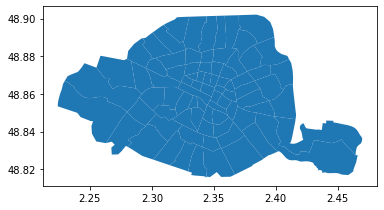

In [ ]:
districts.plot()

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems2.py

Look at the CRS attribute of the GeoDataFrame. Do you recognize the EPSG number?

In [ ]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems3.py

Calculate the area of all districts.

In [ ]:
districts.geometry.area # or districts.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems4.py

Convert the districts to a projected CRS (using the EPSG:2154 for France). Call the new dataset districts_RGF93.

In [ ]:
districts_RGF93 = districts.to_crs(epsg = 2154)
districts_RGF93

id  ...                                           geometry
0    1  ...  POLYGON ((651908.563 6861756.318, 651908.510 6...
1    2  ...  POLYGON ((652264.717 6862479.030, 652178.752 6...
2    3  ...  POLYGON ((651539.853 6862658.479, 651514.121 6...
3    4  ...  POLYGON ((650990.707 6862971.961, 650946.460 6...
4    5  ...  POLYGON ((651314.531 6863309.339, 651280.525 6...
..  ..  ...                                                ...
75  76  ...  POLYGON ((655141.552 6864679.034, 655225.818 6...
76  77  ...  POLYGON ((654754.612 6863184.275, 654747.942 6...
77  78  ...  POLYGON ((657001.413 6863580.002, 657002.434 6...
78  79  ...  POLYGON ((655635.731 6862021.084, 655568.000 6...
79  80  ...  POLYGON ((657143.568 6860903.288, 657141.455 6...

[80 rows x 4 columns]

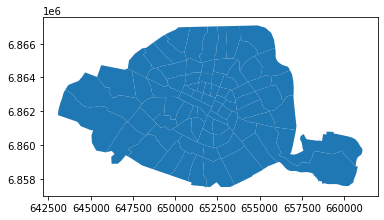

In [ ]:
districts_RGF93.plot()

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems5.py

ora abbiamo messo in metri, perciò verifichiamo che funzioni e che la conversione abbia avuto successo.

In [ ]:
districts_RGF93.geometry.area

0     8.690007e+05
1     4.124585e+05
2     2.736968e+05
3     2.694568e+05
4     1.880122e+05
          ...     
75    1.294988e+06
76    8.065686e+05
77    1.486971e+06
78    1.599002e+06
79    2.090904e+06
Length: 80, dtype: float64

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems6.py

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems7.py

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems8.py

<div class="alert alert-success">

**EXERCISE:**

In the first notebook, we did an exercise on plotting the bike stations locations in Paris and adding a background map to it using the `contextily` package.

Currently, `contextily` assumes that your data is in the Web Mercator projection, the system used by most web tile services. And in that first exercise, we provided the data in the appropriate CRS so you didn't need to care about this aspect.

However, typically, your data will not come in Web Mercator (`EPSG:3857`) and you will have to align them with web tiles on your own.
    
* Read the bike stations datasets (`"data/paris_bike_stations.geojson"`) into a GeoDataFrame called `stations`.
* Convert the `stations` dataset to the Web Mercator projection (`EPSG:3857`). Call the result `stations_webmercator`, and inspect the result.
* Make a plot of this projected dataset (specify the marker size to be 5) and add a background map using `contextily`.

    
<details><summary>Hints</summary>

* Making a simple plot of a GeoDataFrame can be done with the `.plot()` method. This returns a matplotlib axes object.
* The marker size can be specified with the `markersize` keyword if the `plot()` method.
* To add a background map, use the `contextily.add_basemap()` function. It takes the matplotlib `ax` to which to add a map as the first argument.

</details>

</div>

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems9.py

In [ ]:
stations = geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_bike_stations.geojson')
stations

name  ...                  geometry
0                     14002 - RASPAIL QUINET  ...  POINT (2.32956 48.83920)
1        20503 - COURS DE VINCENNES PYRÉNÉES  ...  POINT (2.40591 48.84772)
2                   20011 - PYRÉNÉES-DAGORNO  ...  POINT (2.40517 48.85550)
3              31008 - VINCENNES (MONTREUIL)  ...  POINT (2.43737 48.85770)
4                43006 - MINIMES (VINCENNES)  ...  POINT (2.43079 48.84149)
...                                      ...  ...                       ...
1221                       12011 - CHARENTON  ...  POINT (2.38258 48.84487)
1222             13110 - MOULIN DE LA POINTE  ...  POINT (2.35635 48.82104)
1223                   07006 - QUAI VOLTAIRE  ...  POINT (2.33142 48.85894)
1224  21311 - GAMBETTA (ISSY LES MOULINEAUX)  ...  POINT (2.27855 48.82747)
1225                 01020 - RIVOLI CONCORDE  ...  POINT (2.32525 48.86629)

[1226 rows x 4 columns]

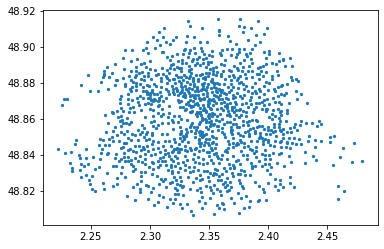

In [ ]:
stations.plot(markersize = 5)

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems10.py

!pip install contextily
****
**già installato scrivo per ricordare**

****
ORA IMPORTIAMO
****

In [ ]:
import contextily as ctx

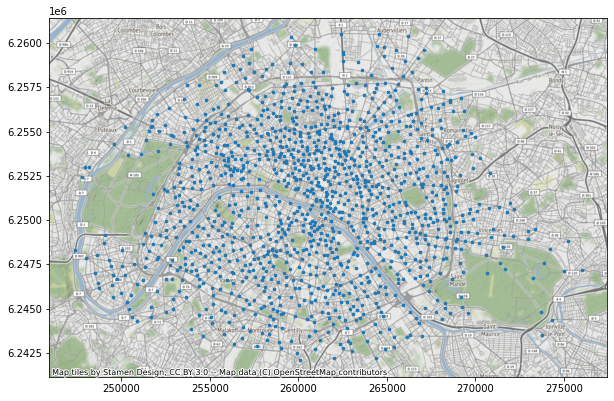

In [ ]:
stations_webmercator = stations.to_crs(epsg = 3857)
ax = stations_webmercator.plot(figsize = (10,10),markersize = 7)
ctx.add_basemap(ax)

In [ ]:
# %load _solved/solutions/02-coordinate-reference-systems11.py

# **03-spatial-relationships-operations**

In [ ]:
import pandas as pd
import geopandas

In [ ]:
countries = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ne_50m_rivers_lake_centerlines.zip")

### Relationships between individual objects

Let's first create some small toy spatial objects:

A polygon <small>(note: we use `.squeeze()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:


**squeeze estrae la geometria, quindi non è più da ritenere un paese, ma un poligono.**

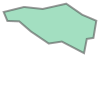

In [ ]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()
belgium

Two points:

In [ ]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

And a linestring:

**crea una linea che collega 2 paesi, in questo caso Parigi e Bruxel**

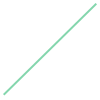

In [ ]:
from shapely.geometry import LineString
line = LineString([paris, brussels])
line

Let's visualize those 4 geometry objects together (I only put them in a GeoSeries to easily display them together with the geopandas `.plot()` method):

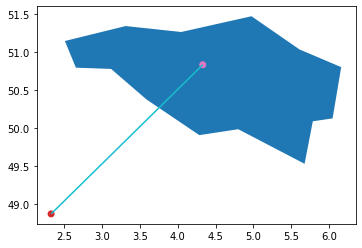

In [ ]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

You can recognize the abstract shape of Belgium.

Brussels, the capital of Belgium, is thus located within Belgium. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [ ]:
brussels.within(belgium)

True

And using the reverse, Belgium contains Brussels:

In [ ]:
belgium.contains(brussels)

True

On the other hand, Paris is not located in Belgium:

In [ ]:
belgium.contains(paris)

False

In [ ]:
paris.within(belgium)

False

The straight line we draw from Paris to Brussels is not fully located within Belgium, but it does intersect with it:

In [ ]:
belgium.contains(line)

False

In [ ]:
line.intersects(belgium)

True

### Spatial relationships with GeoDataFrames

The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `paris` point, it will do this spatial check for each country in the `world` dataframe:

In [ ]:
countries.contains(paris)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

Because the above gives us a boolean result, we can use that to filter the dataframe:

In [ ]:
countries[countries.contains(paris)]

iso_a3  ...                                           geometry
55    FRA  ...  MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7...

[1 rows x 6 columns]

And indeed, France is the only country in the world in which Paris is located.

Another example, extracting the linestring of the Amazon river in South America, we can query through which countries the river flows:


**MOSTRIAMO IL FIUME SOLO SE TRA I RIVERS ESISTE UN FIUME CHE SI CHIAMA AMAZONAS**

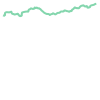

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()
amazon

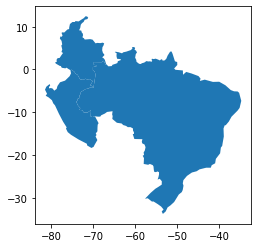

In [ ]:
countries[countries.crosses(amazon)]   # or .intersects
countries[countries.crosses(amazon)].plot()  

<div class="alert alert-info" style="font-size:120%">

**REFERENCE**:

Overview of the different functions to check spatial relationships (*spatial predicate functions*):

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`


See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.

See https://en.wikipedia.org/wiki/DE-9IM for all details on the semantics of those operations.

</div>

## Let's practice!

We will again use the Paris datasets to do some exercises. Let's start importing them again:

In [ ]:
districts = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_bike_stations.geojson").to_crs(epsg=2154)

<div class="alert alert-success">

**EXERCISE: The Eiffel Tower**

The Eiffel Tower is an iron lattice tower built in the 19th century, and is probably the most iconic view of Paris.

The location of the Eiffel Tower is: x of 648237.3 and y of 6862271.9.

* Create a Shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`. Print the result.
* Check if the Eiffel Tower is located within the Montparnasse district (provided).
* Check if the Montparnasse district contains the bike station location.
* Calculate the distance between the Eiffel Tower and the bike station (note: in this case, the distance is returned in meters).


<details><summary>Hints</summary>

* The `Point` class is available in the `shapely.geometry` submodule
* Creating a point can be done by passing the x and y coordinates to the `Point()` constructor.
* The `within()` method checks if the object is located within the passed geometry (used as `geometry1.within(geometry2)`).
* The `contains()` method checks if the object contains the passed geometry (used as `geometry1.contains(geometry2)`).
* To calculate the distance between two geometries, the `distance()` method of one of the geometries can be used.

</details>

</div>

In [ ]:
# Import the Point geometry
from shapely.geometry import Point

eiffel_tower = Point(648237.3 ,6862271.9)

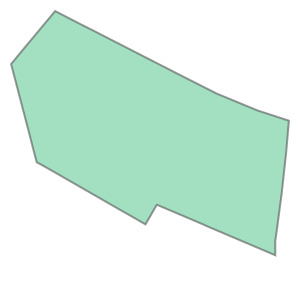

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations1.py
Montparnasse = district.loc[district['district_name'] == 'Montparnasse', 'geometry'].squeeze()
Montparnasse

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations2.py
districts[districts.contains(eiffel_tower)]

id  ...                                           geometry
27  28  ...  POLYGON ((649336.752 6861767.761, 649110.815 6...

[1 rows x 4 columns]

!pip install contextily

In [ ]:
districts.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

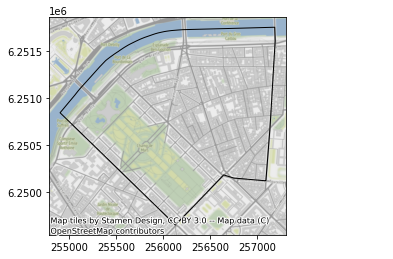

In [ ]:
!pip install contextily

import contextily as ctx

ax = districts[districts.contains(eiffel_tower)].to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor = 'None')  #se i epsg sono diversi, convertire quello dei geodataframe utilizzando il .to_crs(epsg = 3857)
ctx.add_basemap(ax)

In [ ]:
# Accessing the Montparnasse geometry (Polygon)
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations3.py

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations4.py

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations5.py

<div class="alert alert-success">

**EXERCISE: In which district in the Eiffel Tower located?**

In previous exercise, we constructed a `Point` geometry for its location, and we checked that it was not located in the Montparnasse district. Let's now determine in which of the districts of Paris it *is* located.

* Create a boolean mask (or filter) indicating whether each district contains the Eiffel Tower or not. Call the result `mask`.
* Filter the `districts` dataframe with the boolean mask and print the result.


<details><summary>Hints</summary>

* To check for each polygon in the districts dataset if it contains a single point, we can use the `contains()` method of the `districts` GeoDataFrame.
* Filtering the rows of a DataFrame based on a condition can be done by passing the boolean mask into `df[..]`.

</details>

</div>

In [ ]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(648237.3, 6862271.9)

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations6.py

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations7.py

<div class="alert alert-success">

**EXERCISE: How far is the closest bike station?**

Now, we might be interested in the bike stations nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the bikes stations within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the stations. Based on this result, we can then create a mask that takes `True` if the station is within 1km, and `False` otherwise, and use it to filter the stations GeoDataFrame. Finally, we make a visualization of this subset.

* Calculate the distance to the Eiffel Tower for each station, and call the result `dist_eiffel`.
* Print the distance to the closest station (which is the minimum of `dist_eiffel`).
* Select the rows the `stations` GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters). Call the result `stations_eiffel`.

<details><summary>Hints</summary>

* The `distance()` method of a GeoDataFrame works element-wise: it calculates the distance between each geometry in the GeoDataFrame and the geometry passed to the method.
* A Series has a `min()` method to calculate the minimum value.
* To create a boolean mask based on a condition, we can do e.g. `s < 100`.

</details>

</div>

**VISUALIZZARE LE DISTANZE DALLA TORRE EIFFEL**

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations8.py

dist_eiffel = stations.distance(eiffel_tower)
dist_eiffel

0        3343.212509
1        8260.688451
2        8126.514622
3       10482.807156
4       10176.957110
            ...     
1221     6636.204309
1222     6153.437794
1223     2709.390547
1224     3633.146997
1225     2420.249246
Length: 1226, dtype: float64

**VISUAL DISTANZA MINORE DALLA T. EIFFEL**

In [ ]:
dist_eiffel.min()

232.34672323280478

**VISUAL STAZIONE PIU' VICINA ALLA T. EIFFEL**

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations9.py
dist_eiffel = stations.distance(eiffel_tower)
stations[stations.distance(eiffel_tower) == dist_eiffel.min()]

name  ...                        geometry
1154  07025 - SUFFREN TOUR EIFFEL  ...  POINT (648138.476 6862061.617)

[1 rows x 4 columns]

**VISUALIZZARE LE STAZIONI CHE DALLA TORRE EIFFEL DISTANO MASSIMO 1 KM(1000 m)**

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations10.py

stations_eiffel = stations[stations.distance(eiffel_tower)<=1000]
stations_eiffel

name  ...                        geometry
263                                  15024 - LAOS  ...  POINT (648728.356 6861434.945)
286                               15028 - DUPLEIX  ...  POINT (648038.777 6861494.699)
313                                15025 - AMETTE  ...  POINT (648392.589 6861497.926)
400                            16112 - CHERNOVITZ  ...  POINT (647331.479 6862122.655)
447                        07022 - PONT DE L'ALMA  ...  POINT (648809.115 6862626.943)
560                                  07020 - CLER  ...  POINT (649123.233 6862068.245)
568                          08046 - ALMA MARCEAU  ...  POINT (648665.831 6863023.406)
599                    15105 - SUFFREN FÉDÉRATION  ...  POINT (648479.455 6861643.109)
620               07021 - BOSQUET SAINT DOMINIQUE  ...  POINT (648913.753 6862293.667)
668                       07019 - ECOLE MILITAIRE  ...  POINT (649039.413 6861881.063)
764               07023 - BOURDONNAIS TOUR EIFFEL  ...  POINT (648320.455 6862548.694)
789                                15067 - DESAIX  ...  POINT (648127.331 6861650.461)
810                          16023 - RUE DE PASSY  ...  POINT (647476.382 6862276.446)
824                           07024 - AVENUE RAPP  ...  POINT (648679.362 6862242.066)
981                            15026 - BIR HAKEIM  ...  POINT (647880.969 6861768.258)
1078                             07103 - BELGRADE  ...  POINT (648802.808 6862006.373)
1091              15106 - GRENELLE VIOLET (PROP3)  ...  POINT (648240.661 6861328.805)
1093                            16007 - LONGCHAMP  ...  POINT (648098.453 6862996.886)
1105  00904 -17/19 PLACE JOFFRE / ECOLE MILITAIRE  ...  POINT (648775.478 6861575.339)
1134                       16014 - AVENUE D EYLAU  ...  POINT (647647.787 6862849.259)
1154                  07025 - SUFFREN TOUR EIFFEL  ...  POINT (648138.476 6862061.617)
1158             15071 - CHAMP DE MARS COTE 16EME  ...  POINT (648271.044 6861876.817)
1204                                 08045 - ALMA  ...  POINT (648834.261 6862991.511)

[23 rows x 4 columns]

**VISUALLIZARE L'ESERCIZIO PRECENDENTE**

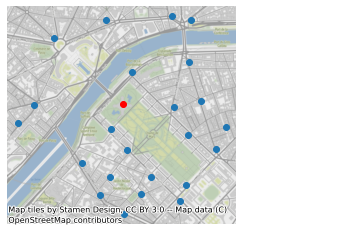

In [ ]:
# Make a plot of the close-by restaurants
ax = stations_eiffel.to_crs(epsg=3857).plot()
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').to_crs(epsg=3857).plot(ax=ax, color='red')
import contextily
contextily.add_basemap(ax)
ax.set_axis_off()

## Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas also provide operations that return new geometric objects.




**CON BUFFER SI LAVORA SU AREE  DELLE CITTA', E TUTTE LE VARI FUNZIONI ASSOCIATE** 
**Binary operations:**

<table><tr>
<td> <img src="img/spatial-operations-base.png"/> </td>
<td> <img src="img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-union.png"/> </td>
<td> <img src="img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

For example, using the toy data from above, let's construct a buffer around Brussels (which returns a Polygon):

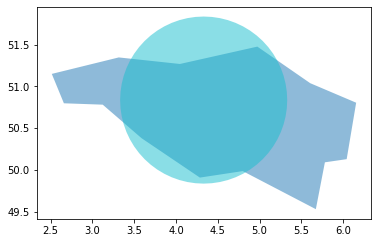

In [ ]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

and now take the intersection, union or difference of those two polygons:

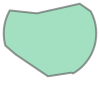

In [ ]:
brussels.buffer(1).intersection(belgium)

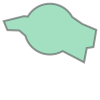

In [ ]:
brussels.buffer(1).union(belgium)

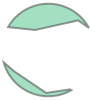

In [ ]:
brussels.buffer(1).difference(belgium)

Another useful method is the `unary_union` attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries.

**UNISCE TUTTI I POLIGONI IN UN UNICO POLIGONO.**

For example, we can construct a single object for the Africa continent:

In [ ]:
africa_countries = countries[countries['continent'] == 'Africa']

In [ ]:
africa = africa_countries.unary_union

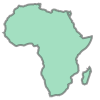

In [ ]:
africa

In [ ]:
print(str(africa)[:1000])

MULTIPOLYGON (((40.43725304541869 -11.76171070724502, 40.56081139502857 -12.63917652756103, 40.59962039567975 -14.20197519293186, 40.775475294769 -14.69176441819424, 40.4772506040126 -15.40629444749397, 40.08926395036522 -16.10077402106446, 39.45255862809705 -16.72089120856694, 38.53835086442152 -17.10102304450596, 37.41113284683888 -17.58636809659124, 36.28127933120936 -18.65968759529345, 35.89649661636406 -18.84226043058064, 35.19839969253314 -19.55281137459389, 34.78638349787005 -19.78401173266774, 34.70189253107284 -20.49704314543101, 35.17612715021536 -21.25436126066841, 35.37342776870574 -21.84083709074888, 35.3858482537054 -22.14, 35.56254553636909 -22.09, 35.5339347674043 -23.07078785572776, 35.37177412287238 -23.5353589820317, 35.60747033055563 -23.70656300221468, 35.45874555841962 -24.12260995859655, 35.04073489761066 -24.47835051849381, 34.21582400893547 -24.81631438568266, 33.01321007663901 -25.35757333750774, 32.57463219577787 -25.72731821055609, 32.66036339695009 -26.1485

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**:

GeoPandas (and Shapely for the individual objects) provides a whole lot of basic methods to analyse the geospatial data (distance, length, centroid, boundary, convex_hull, simplify, transform, ....), much more than the few that we can touch in this tutorial.


* An overview of all methods provided by GeoPandas can be found here: http://geopandas.readthedocs.io/en/latest/reference.html


</div>



## Let's practice!

<div class="alert alert-success">
 <b>EXERCISE: What are the districts close to the Seine?</b>
 
 <p>
 Below, the coordinates for the Seine river in the neighbourhood of Paris are provided as a GeoJSON-like feature dictionary (created at http://geojson.io). 
 </p>
 
  <p>
 Based on this `seine` object, we want to know which districts are located close (maximum 150 m) to the Seine. 
 </p>
 
 
 <p>
 <ul>
  <li>Create a buffer of 150 m around the Seine.</li>
  <li>Check which districts intersect with this buffered object.</li>
  <li>Make a visualization of the districts indicating which districts are located close to the Seine.</li>
 </ul> 
 </p>
 
</div>

In [ ]:
districts = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/paris_districts.geojson").to_crs(epsg=2154)

In [ ]:

# created a line with http://geojson.io
s_seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# convert to local UTM zone
s_seine_utm = s_seine.to_crs(epsg=2154)

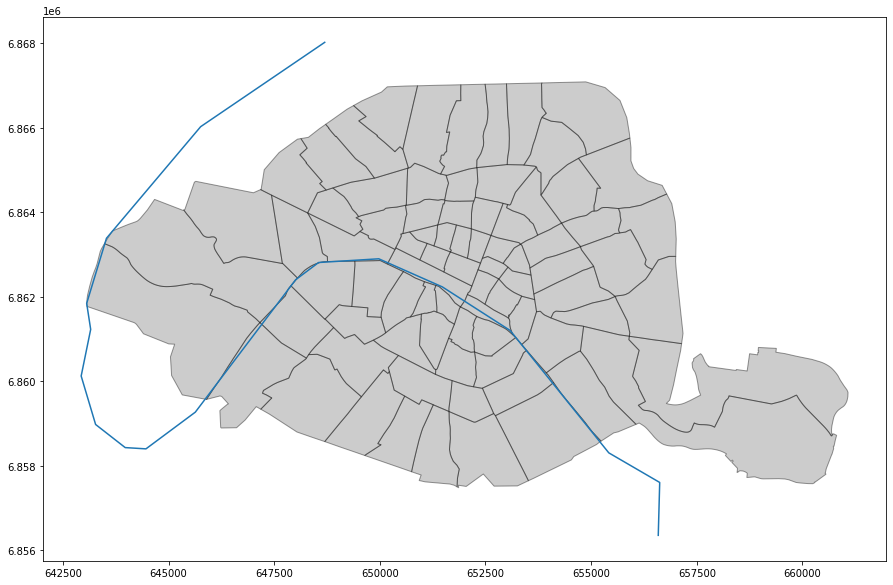

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

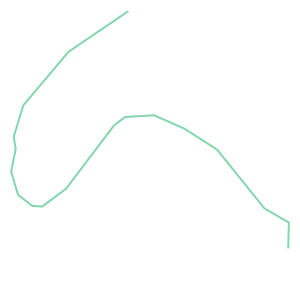

In [ ]:
# access the single geometry object
seine = s_seine_utm.geometry.squeeze()
seine

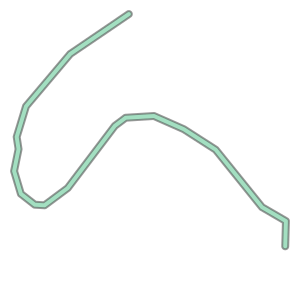

In [ ]:
seine_buffer = seine.buffer(150)
seine_buffer

ORA VEDIAMO I QUARTIERI CHE INSTERSECANO CON IL FIUME SENNA

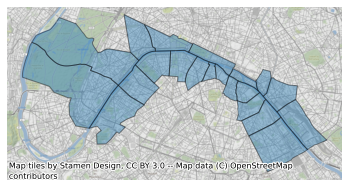

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations11.py
import contextily as ctx

ax = districts[districts.intersects(seine_buffer)].to_crs(epsg = 3857).plot( edgecolor='k',alpha=0.4)

ctx.add_basemap(ax)
ax.set_axis_off()

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations12.py

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations13.py

In [ ]:
# %load _solved/solutions/03-spatial-relationships-operations14.py